In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [4]:
# Load dataset
data = pd.read_csv("/kaggle/input/iris/Iris.csv")

# Drop 'Id' column if present
data.drop('Id', axis=1, inplace=True)

# Show sample data
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
# Split features and target
X = data.iloc[:, :-1].values  # All columns except species
y = data.iloc[:, -1].values   # Species column

# Encode string labels to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"K = {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 40)

K = 1
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
----------------------------------------
K = 2
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
----------------------------------------
K = 3
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
----------------------------------------
K = 4
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
----------------------------------------
K = 5
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
----------------------------------------
K = 6
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
----------------------------------------
K = 7
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
----------------------------------------
K = 8
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
----------------------------------------
K = 9
Accuracy: 1.0

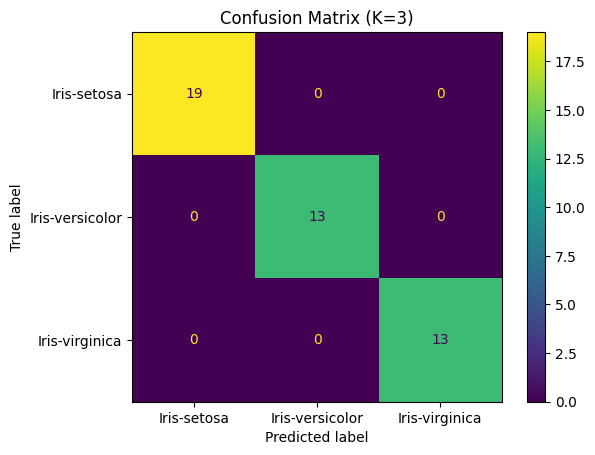

In [8]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis')
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

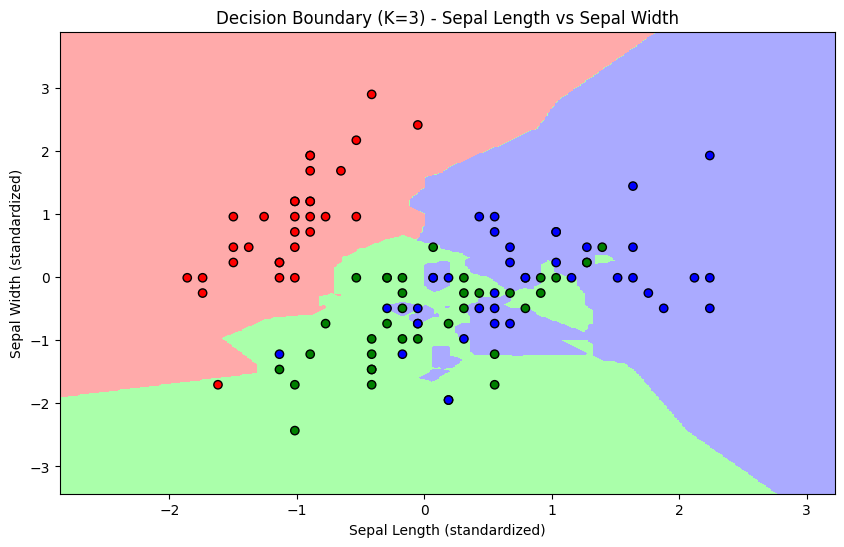

In [9]:
# Use only first 2 features for visualization
X_vis = data.iloc[:, [0, 1]].values
y_vis = le.fit_transform(data['Species'])

# Train-test split & scale
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Plot decision boundaries
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red', 'green', 'blue']), edgecolor='k')
plt.title(f"Decision Boundary (K={best_k}) - Sepal Length vs Sepal Width")
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.show()

The decision boundary plot for K=3 using standardized Sepal Length and Sepal Width from the Iris dataset visually demonstrates how the K-Nearest Neighbors (KNN) algorithm classifies data points into different species. The background colors (red, green, and blue) represent the decision regions where any new point falling into that region would be classified as one of the three Iris species — likely Setosa, Versicolor, and Virginica. The red region appears clearly separated, indicating that Iris-setosa is easily distinguishable from the other two classes using just Sepal features.

Each dot in the plot represents a data sample from the training set, colored according to its true class label. The red dots (Setosa) are mostly grouped in the red region, showing high classification confidence. However, the green (Versicolor) and blue (Virginica) regions overlap significantly, leading to a jagged and complex boundary between them. This suggests that Sepal Length and Width alone are not sufficient for a clean separation between Versicolor and Virginica.

The overall plot highlights a key characteristic of KNN — its ability to produce non-linear, flexible decision boundaries based on local neighbor patterns. However, it also reveals a limitation: the model struggles to accurately separate classes when features are not distinct enough. For better classification accuracy and clearer decision boundaries, incorporating Petal Length and Petal Width (which are more discriminative in the Iris dataset) would be beneficial.